## **Librerías**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = False

In [3]:
import plotly.express as px

## **Datos**

In [4]:
df = pd.read_csv('./Data/netflix_titles.csv')

In [5]:
df.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3724,s3725,TV Show,Neon Genesis Evangelion,NaN,"Megumi Ogata, Kotono Mitsuishi, Yuriko Yamaguc...",Japan,"June 21, 2019",1995,TV-MA,1 Season,"Anime Series, International TV Shows","Fifteen years after the Second Impact, Shinji ..."


### **Limpieza de Datos**

In [6]:
df['release_decade'] = df['release_year'].apply(lambda x: str(x//10 * 10)+'s')

### **Preguntas rápidas**

1. ¿Cuál es el país con más producciones dentro de la plataforma?

In [7]:
df_country = df.groupby('country')[['show_id']].count().reset_index().sort_values('show_id', ascending=False)
df_country['%'] = df_country['show_id'].apply(lambda x: round(x/df_country['show_id'].sum()*100, 2))
df_country.head(5)

,country,show_id,%
603,United States,2818,35.33
251,India,972,12.19
506,United Kingdom,419,5.25
319,Japan,245,3.07
435,South Korea,199,2.49


2. ¿Cuál ha sido el periodo con más estrenos?

In [8]:
df_año = df.groupby('release_decade')[['show_id']].count().reset_index().sort_values('show_id', ascending=False)
df_año['%'] = df_año['show_id'].apply(lambda x: round(x/df_año['show_id'].sum()*100, 2))
df_año.head(5)

,release_decade,show_id,%
8,2010s,5927,67.30
9,2020s,1545,17.54
7,2000s,810,9.20
6,1990s,274,3.11
5,1980s,129,1.46


3. ¿Cuál ha sido el tipo de contenido principal?

In [9]:
df_tipo_contenido = df.groupby('type')[['show_id']].count().reset_index().sort_values('show_id', ascending=False)
df_tipo_contenido['%'] = df_tipo_contenido['show_id'].apply(lambda x: round(x/df_tipo_contenido['show_id'].sum()*100, 2))
df_tipo_contenido

,type,show_id,%
0,Movie,6131,69.62
1,TV Show,2676,30.38


4. ¿Cuál ha sido la clasificación (rating) más frecuente por decada?

In [10]:
pd.crosstab(index=df['release_decade'], columns=df['rating'])

rating,66 min,74 min,84 min,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
release_decade,,,,,,,,,,,,,,,,,
1920s,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1940s,0,0,0,0,0,0,0,0,0,7,0,2,6,0,0,0,0
1950s,0,0,0,2,0,1,0,1,0,5,1,0,1,0,0,0,0
1960s,0,0,0,3,0,0,0,2,4,7,1,2,6,0,0,0,0
1970s,0,0,0,4,0,1,13,1,11,15,1,12,11,0,0,0,1
1980s,0,0,0,2,0,3,16,10,21,46,0,16,13,0,2,0,0
1990s,0,0,0,5,0,2,18,55,75,52,9,32,17,2,7,0,0
2000s,0,0,0,14,0,5,69,144,137,217,6,113,73,6,25,0,1
2010s,1,1,1,10,3,68,145,242,482,1485,136,2291,611,214,226,6,1


## **EDA**

### **Histogramas**

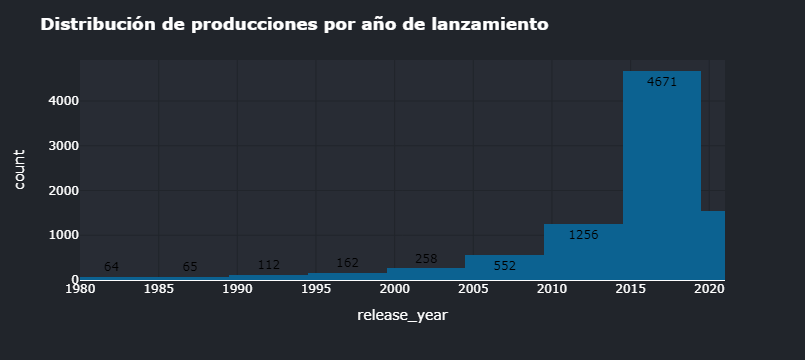

In [72]:
fig = px.histogram(
    df, 
    x='release_year', 
    nbins=20,
    range_x=[1980, df['release_year'].max()],
    text_auto=True
)

fig.update_layout(
    # Titulo
    title_text='<b>Distribución de producciones por año de lanzamiento</b>',
    title_font=dict(color='white'),
    
    # Fondo
    paper_bgcolor = '#21252b',
    plot_bgcolor='#282c34',
    
    # Ejes
    
    xaxis_title_font=dict(color='white'),
    yaxis_title_font=dict(color='white'),
    xaxis_tickfont=dict(color='white'),
    yaxis_tickfont=dict(color='white'),
    
    #xaxis_tickangle=90,
    
    # Cuadricula
    xaxis_gridcolor='#21252b',    
    yaxis_gridcolor='#21252b', 
    xaxis_showgrid=True,
    yaxis_showgrid=True,
)

fig.update_traces(
    # Color del gráfico
    marker_color='#0c6291',
    textfont=dict(color='black')
    # Color del texto

)


fig.show()